In [83]:
import numpy as np
import pandas as pd
import os

In [84]:
parking_df = pd.read_csv("parking_data (1).csv", encoding='cp949') # 한글 읽기 위한 encoding type 설정
parking_df

단지코드  총세대수 임대건물구분       지역 지역_공영주차장대수  지역_직장인평균연봉    지역_총인구수  \
0    C1024   680    아파트    서울특별시     67,882  48,600,000  9,422,710   
1    C1039   790    아파트    서울특별시     67,882  48,600,000  9,422,710   
2    C1344   424    아파트    서울특별시     67,882  48,600,000  9,422,710   
3    C1397   370    아파트    서울특별시     67,882  48,600,000  9,422,710   
4    C1652   890    아파트    서울특별시     67,882  48,600,000  9,422,710   
..     ...   ...    ...      ...        ...         ...        ...   
418  C2531   540    아파트  제주특별자치도      4,882  34,900,000    677,115   
419  C2549   202    아파트  제주특별자치도      4,882  34,900,000    677,115   
420  C2586    90    아파트  제주특별자치도      4,882  34,900,000    677,115   
421  C2609   556    아파트  제주특별자치도      4,882  34,900,000    677,115   
422  C2661   354    아파트  제주특별자치도      4,882  34,900,000    677,115   

     지역_20~59세 인구비율   전용면적  공실      임대보증금      임대료  \
0            0.6086  84.96   2  117309000  1058030   
1            0.6086  33.11  13   14263000   117620   
2            0.6086  84.99   0  142744000   361800   
3            0.6086  59.93   9  216423000        -   
4            0.6086  44.83  20  100400000   334660   
..              ...    ...  ..        ...      ...   
418          0.5661  36.78  22   35200000   149600   
419          0.5661  36.92  17   34800000   147900   
420          0.5661  36.72   7   36000000   153000   
421          0.5661  46.96  17   24984000   290430   
422          0.5661  46.96  12   22043000   231180   

     도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  등록차량수  단지내주차면수  
0                               0                 3.0    957      877  
1                               0                 3.0    645      673  
2                               0                 3.0    509      467  
3                               0                 3.0   1595     1590  
4                               1                 8.0    509      423  
..                            ...                 ...    ...      ...  
418                             0                 6.0    358      397  
419                             0                 2.0    165      141  
420                             0                 3.0     57       66  
421                             0                 2.0    555      490  
422                             0                 6.0    330      297  

[423 rows x 16 columns]

In [85]:
new_cols = ['code','n_house','type','region','region_park','income','population','middle_age','area_exclusive','vacancy','deposit','rent','subway_station','bus_station','car','parking_lot'] # 열이름을 변경하기 위한 list

parking_df.columns = new_cols # 열이름 변경

In [86]:
parking_df.info() # 모든 column type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            423 non-null    object 
 1   n_house         423 non-null    int64  
 2   type            423 non-null    object 
 3   region          423 non-null    object 
 4   region_park     423 non-null    object 
 5   income          423 non-null    object 
 6   population      423 non-null    object 
 7   middle_age      423 non-null    float64
 8   area_exclusive  423 non-null    float64
 9   vacancy         423 non-null    int64  
 10  deposit         423 non-null    object 
 11  rent            423 non-null    object 
 12  subway_station  423 non-null    int64  
 13  bus_station     422 non-null    float64
 14  car             423 non-null    int64  
 15  parking_lot     423 non-null    int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 53.0+ KB


In [87]:
parking_df.isna().sum() # 결측치 확인

code              0
n_house           0
type              0
region            0
region_park       0
income            0
population        0
middle_age        0
area_exclusive    0
vacancy           0
deposit           0
rent              0
subway_station    0
bus_station       1
car               0
parking_lot       0
dtype: int64

In [88]:
parking_df.dropna(subset=['bus_station'],inplace=True) # 결측치 1개이므로 그냥 drop 한다.

parking_df['bus_station'].isna().sum() # 재확인

0

In [89]:
parking_df['deposit'] = pd.to_numeric(parking_df['deposit']) # test 용으로 object type을 갖고 있는 열 중 하나인 deposit을 numeric type으로 변경하려 했으나 - 값이 발견되어 오류 발생

ValueError: Unable to parse string "-" at position 10

In [90]:
parking_df[parking_df['deposit']=='-'] # - 값을 갖고 있는 부분 확인

code  n_house type region region_park      income population  middle_age  \
10  C1326     1934  아파트  부산광역시      23,890  39,500,000  3,311,402      0.5482   

    area_exclusive  vacancy deposit rent  subway_station  bus_station   car  \
10           46.94       43       -    -               0          4.0  1153   

    parking_lot  
10         1670

In [91]:
def rm_str(df_in:pd.DataFrame, target_cols:list, target_str:tuple) -> pd.DataFrame: 
    """
        Input DataFrame의 특정 column의 str을 대체하는 함수

        Inputs:
            df_in : DataFrame 입력
            target_cols : 입력 DataFrame에 대해 str 대체를 수행할 target column list
            target_str : 입력 DataFrame에 대해 from str 과 to str의 값을 tuple 형식으로 갖고 있음.

        Output:
            처리된 df_in이 출력됨.
    """

    for t_c in target_cols:
        df_in[t_c] = df_in[t_c].str.replace(f'{target_str[0]}', target_str[1]) # 특정 column에 대해 replace 진행

    return df_in

In [92]:
rm_comma = ['region_park','income','population'] # parking df 내 ,를 갖고있는 열이름들의 조합
rm_hypen = ['deposit', 'rent'] # parking df 내 -을 갖고있는 열 이름들의 조합

parking_df = rm_str(df_in=parking_df, target_cols=rm_comma, target_str=(',','')) # , 를 없앤다.
parking_df = rm_str(df_in=parking_df, target_cols=rm_hypen, target_str=('-','0')) # -를 0로 바꾼다.


In [93]:

for c in parking_df.columns:
    parking_df[c] = pd.to_numeric(parking_df[c], errors='ignore') # 모든 column에 대해 숫자로 변경이 가능한 column은 정수형으로 변경한다. 불가능한경우 원상태를 유지하도록한다.

In [94]:
parking_df.info() # 변경후 재확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 422
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            422 non-null    object 
 1   n_house         422 non-null    int64  
 2   type            422 non-null    object 
 3   region          422 non-null    object 
 4   region_park     422 non-null    int64  
 5   income          422 non-null    int64  
 6   population      422 non-null    int64  
 7   middle_age      422 non-null    float64
 8   area_exclusive  422 non-null    float64
 9   vacancy         422 non-null    int64  
 10  deposit         422 non-null    int64  
 11  rent            422 non-null    int64  
 12  subway_station  422 non-null    int64  
 13  bus_station     422 non-null    float64
 14  car             422 non-null    int64  
 15  parking_lot     422 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 56.0+ KB


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# 음수와 한글 표기 가능하도록 setup
plt.rc('font', family='malgun gothic') 
plt.rcParams['axes.unicode_minus']= False


In [96]:
parking_df.describe() # 수치형으로 변환된 column 들의 기초 통계 summary

n_house   region_park        income    population  middle_age  \
count   422.000000    422.000000  4.220000e+02  4.220000e+02  422.000000   
mean    722.736967  33255.341232  4.201825e+07  4.618824e+06    0.558941   
std     406.007997  34346.172519  3.973233e+06  4.779216e+06    0.033129   
min      26.000000   2765.000000  3.490000e+07  3.858250e+05    0.501700   
25%     446.250000  11059.000000  3.950000e+07  1.533356e+06    0.541100   
50%     632.000000  17021.000000  4.180000e+07  2.357881e+06    0.549100   
75%     923.500000  23890.000000  4.320000e+07  3.311402e+06    0.591100   
max    2568.000000  97841.000000  4.860000e+07  1.360792e+07    0.608600   

       area_exclusive     vacancy       deposit          rent  subway_station  \
count      422.000000  422.000000  4.220000e+02  4.220000e+02      422.000000   
mean        50.819526   13.476303  3.093461e+07  2.177763e+05        0.120853   
std         12.827926   10.397476  2.393784e+07  1.295854e+05        0.380138   
min         23.480000    0.000000  0.000000e+00  0.000000e+00        0.000000   
25%         46.227500    5.000000  1.778675e+07  1.350025e+05        0.000000   
50%         51.860000   13.000000  2.523300e+07  1.853200e+05        0.000000   
75%         59.602500   20.000000  3.604800e+07  2.726100e+05        0.000000   
max         84.990000   55.000000  2.164230e+08  1.058030e+06        3.000000   

       bus_station          car  parking_lot  
count   422.000000   422.000000   422.000000  
mean      3.699052   571.665877   591.623223  
std       2.805991   391.253664   367.366461  
min       0.000000    13.000000    13.000000  
25%       2.000000   294.500000   319.250000  
50%       3.000000   505.000000   522.000000  
75%       4.000000   761.750000   798.500000  
max      20.000000  2550.000000  1798.000000

<AxesSubplot:>

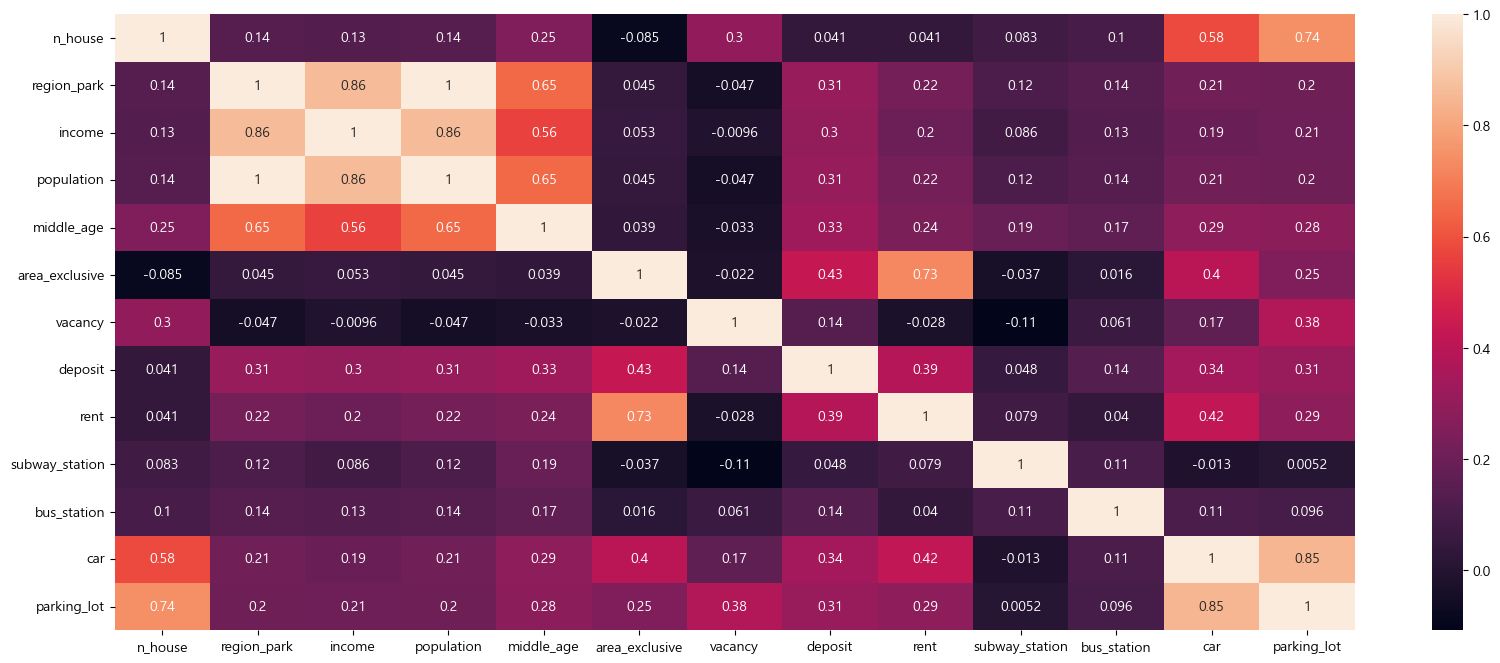

In [97]:
plt.figure(figsize=(20,8))
sns.heatmap(parking_df.corr(), annot=True)

# 각 수치형 값들에 대한 

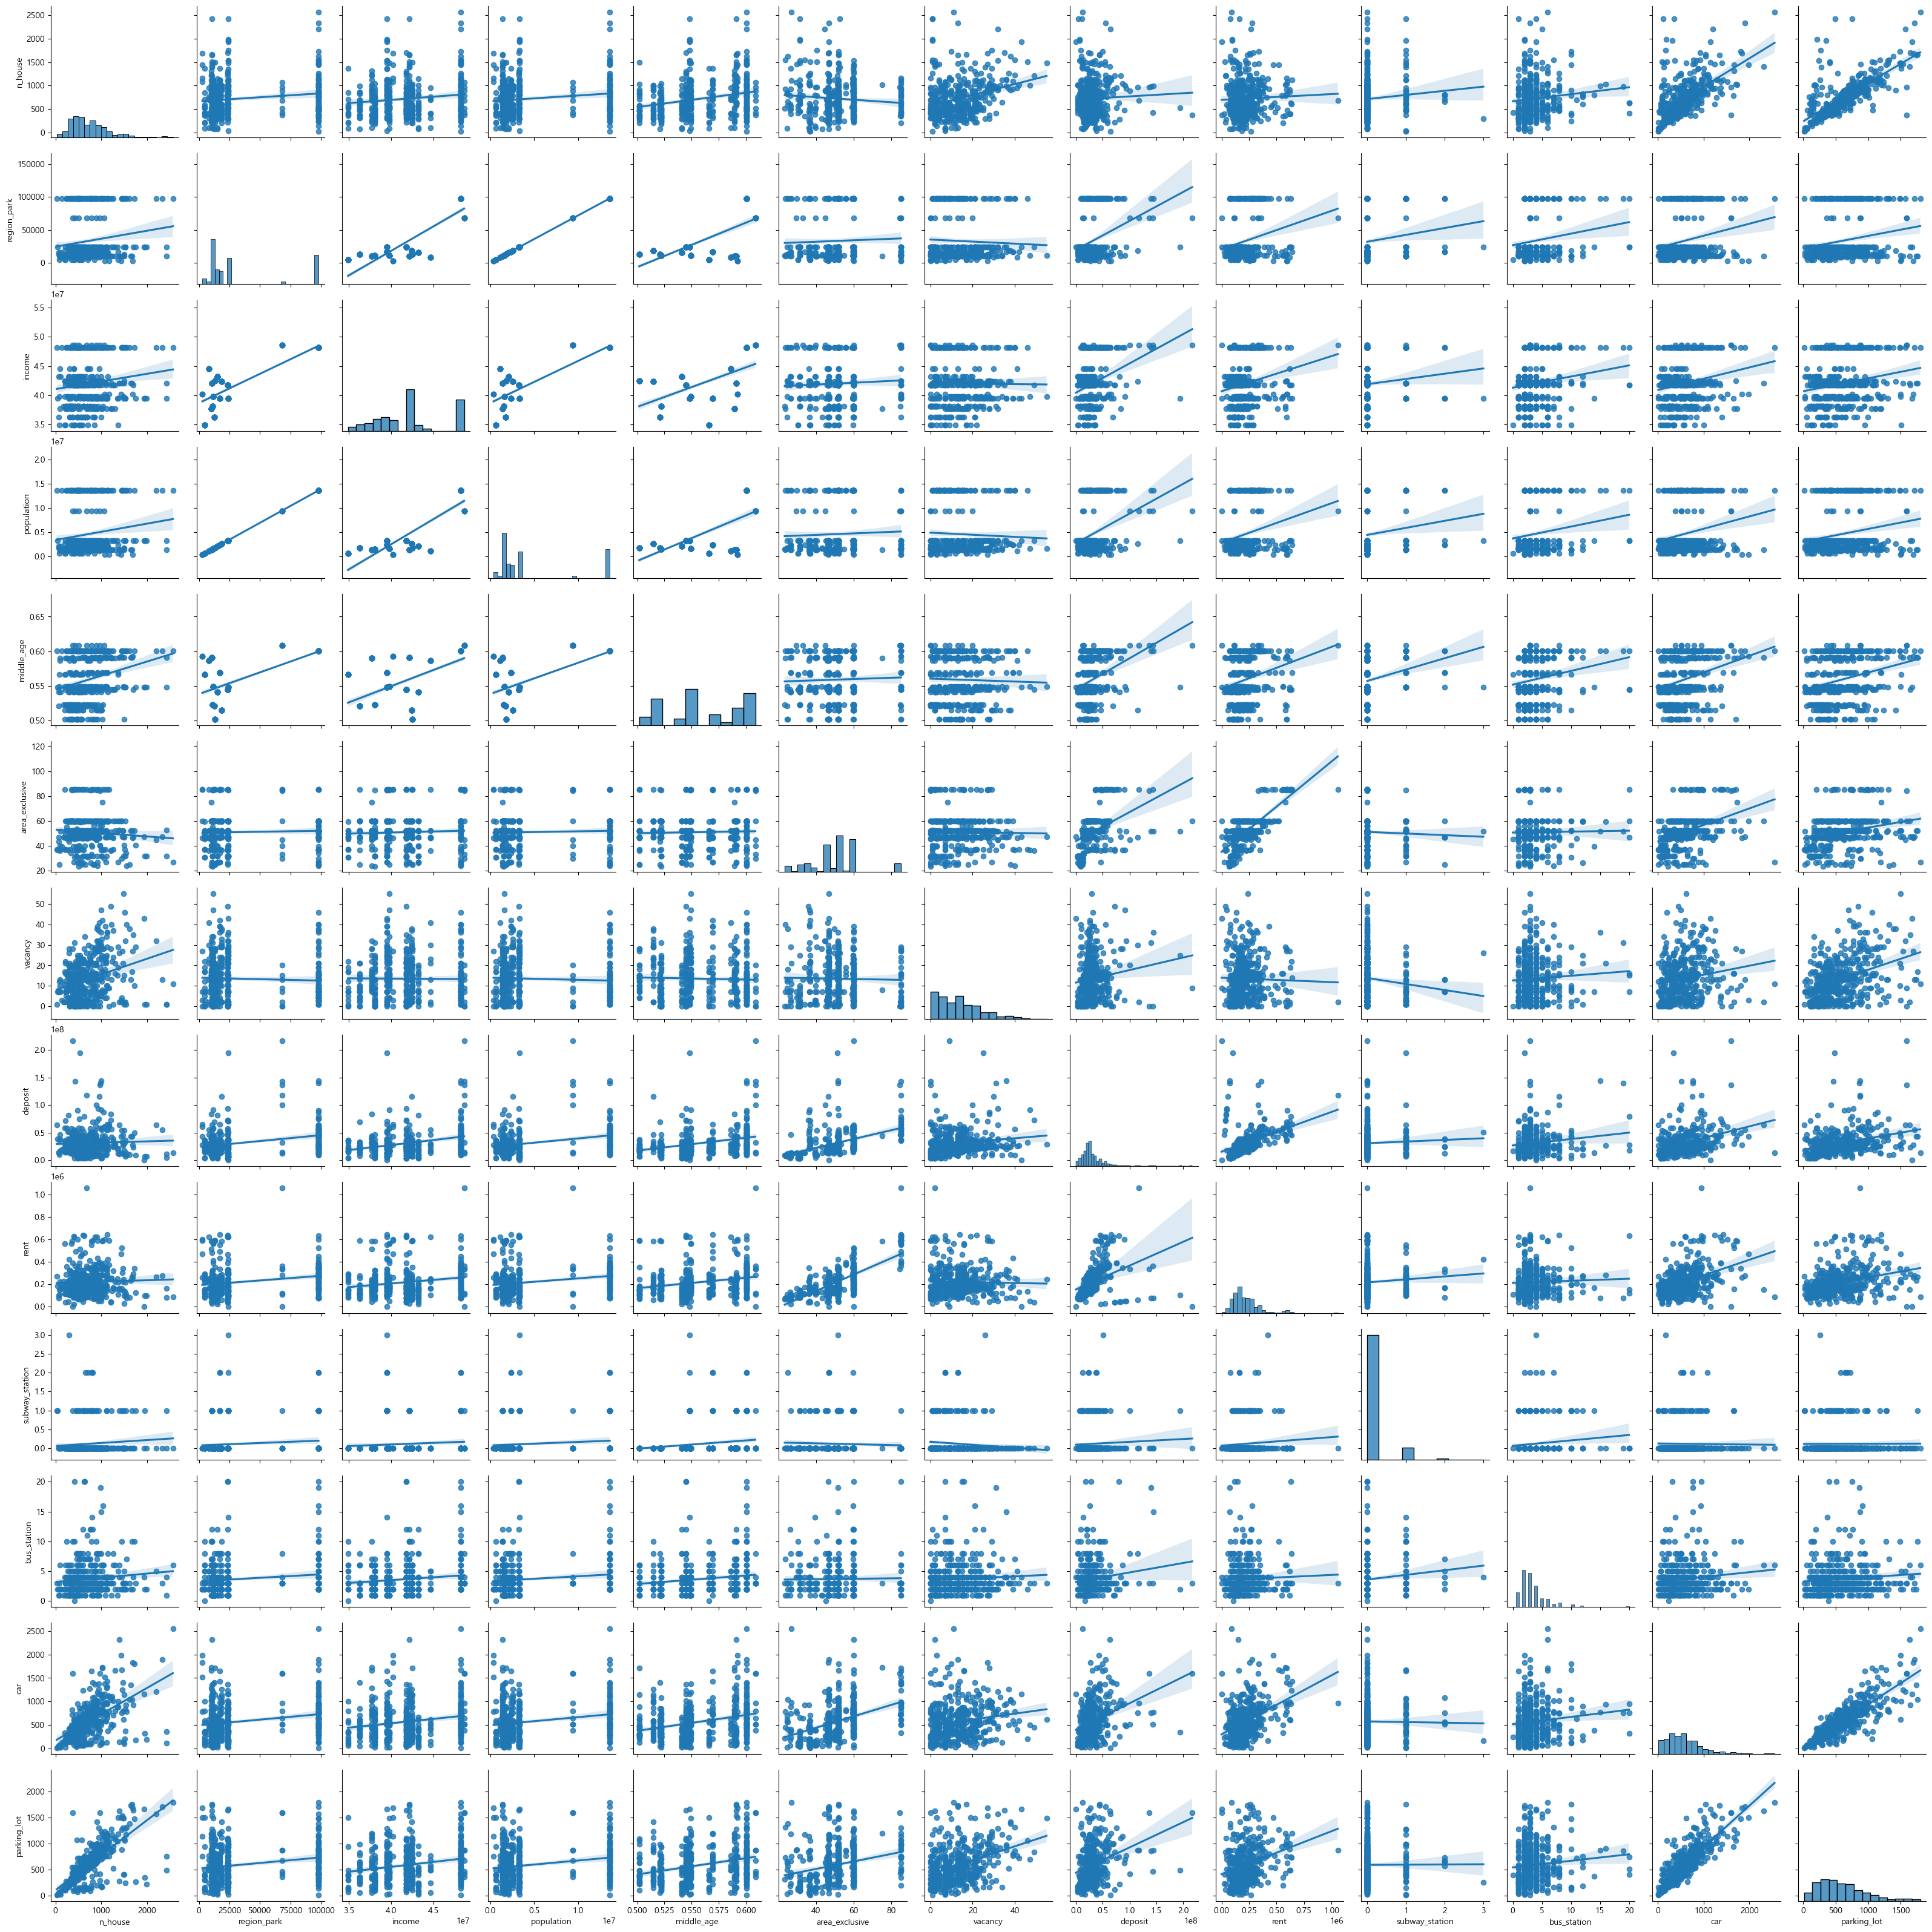

In [60]:
sns.pairplot(data=parking_df, kind='reg')

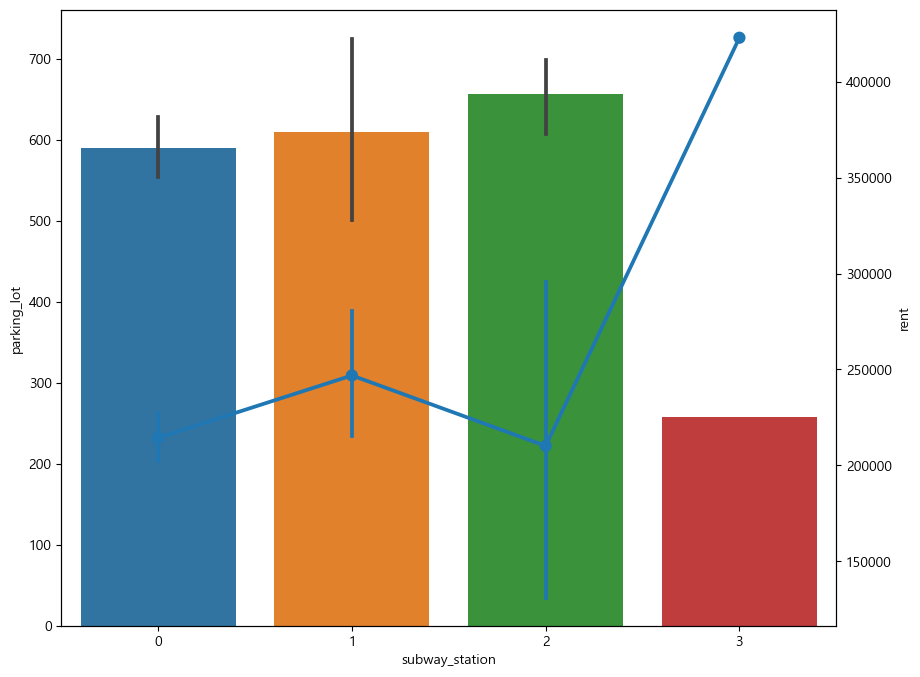

In [98]:
# subway station 수에 따른 parking lot , subway station 수에 따른 rent비용 point plot


figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 8)
ax2 = ax1.twinx()
g = sns.barplot(data=parking_df, x='subway_station', y='parking_lot', ax=ax1)

g2 = sns.pointplot(data=parking_df, x='subway_station', y='rent', ax=ax2)

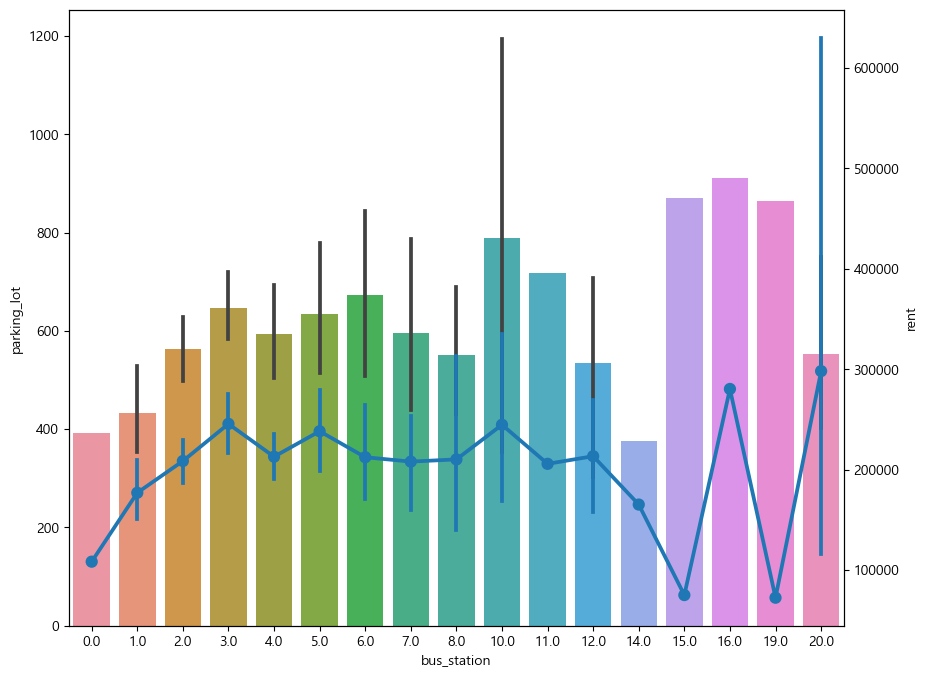

In [73]:
# bus station 수에 따른 parking lot , subway station 수에 따른 rent비용 point plot

figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 8)
ax2 = ax1.twinx()
g = sns.barplot(data=parking_df, x='bus_station', y='parking_lot', ax=ax1)

g2 = sns.pointplot(data=parking_df, x='bus_station', y='rent', ax=ax2)

In [54]:
valid_cols = ['region','area_exclusive', 'vacancy', 'subway_station', 'bus_station', 'parking_lot']

df = parking_df[valid_cols]
df.head()

region  area_exclusive  vacancy  subway_station  bus_station  parking_lot
0  서울특별시           84.96        2               0          3.0          877
1  서울특별시           33.11       13               0          3.0          673
2  서울특별시           84.99        0               0          3.0          467
3  서울특별시           59.93        9               0          3.0         1590
4  서울특별시           44.83       20               1          8.0          423

In [59]:
df['bus_station'].unique()

array([ 3.,  8.,  4.,  2.,  1., 14.,  6.,  7.,  5., 10., 12., 19., 11.,
       16., 15., 20., nan,  0.])

<AxesSubplot:>

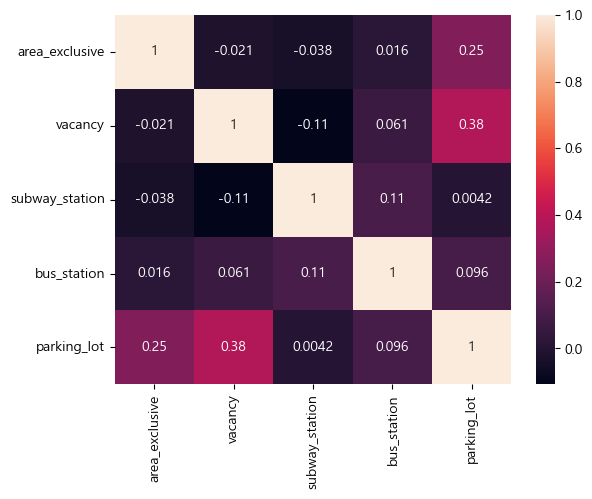

In [56]:
sns.heatmap(df.corr(), annot=True)

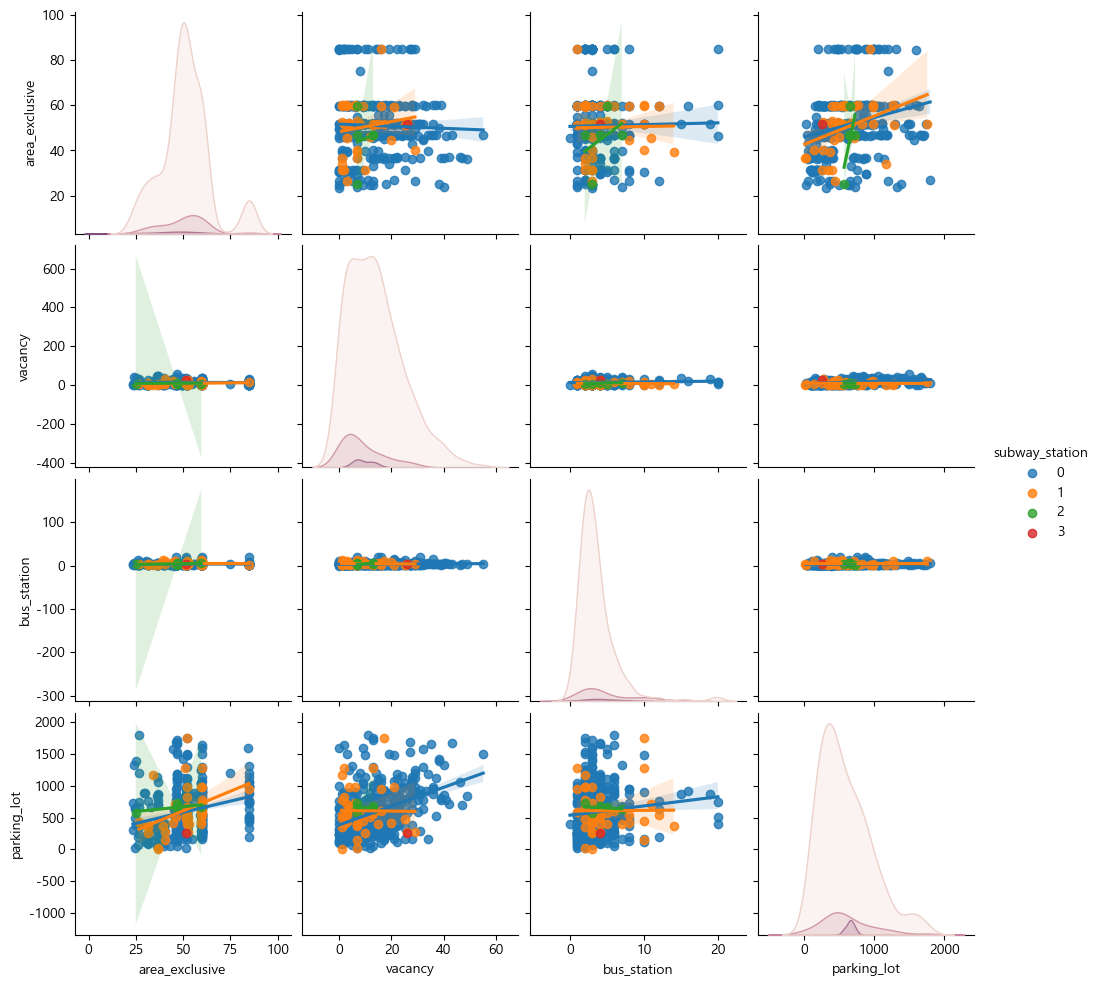

In [58]:
sns.pairplot(data=df, kind='reg', hue='subway_station')